<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-21 14:38:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  32.1MB/s    in 1.1s    

2024-10-21 14:39:02 (32.1 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:title={'center':'Histogram for Converted Compensation'}, ylabel='Frequency'>

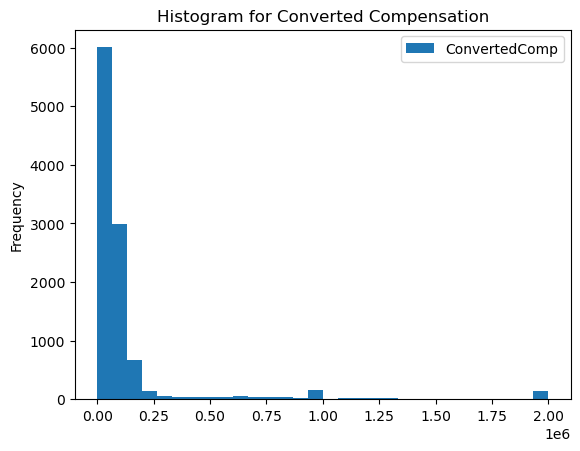

In [8]:
# your code goes here
QUERY ='''
select ConvertedComp from master
'''
df_hist = pd.read_sql_query(QUERY, conn)
df_hist.plot.hist(bins=30, title ='Histogram for Converted Compensation')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:title={'center':'Box Plot for Age'}>

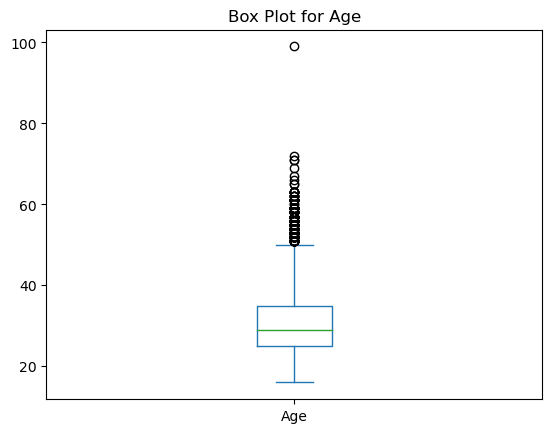

In [9]:
QUERY ='''
select Age from master
'''
df_box = pd.read_sql_query(QUERY, conn)
df_box.plot.box(title ='Box Plot for Age')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:title={'center':' Relationship between Age and WorkWeekHrs'}, xlabel='Age', ylabel='WorkWeekHrs'>

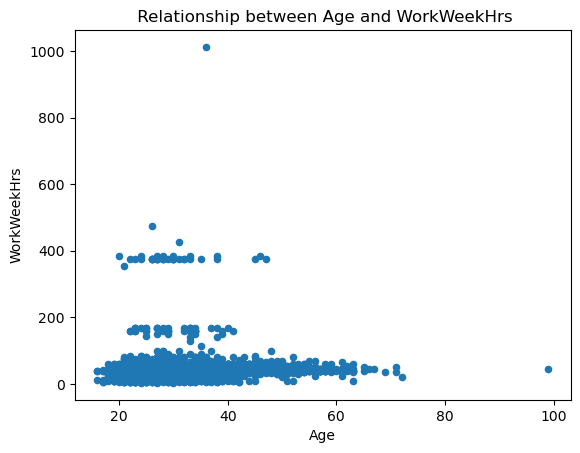

In [10]:
QUERY ='''
select Age, WorkWeekHrs from master
'''
df_scatter = pd.read_sql_query(QUERY, conn)
df_scatter.plot.scatter(x= 'Age', y='WorkWeekHrs', title =' Relationship between Age and WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:title={'center':' Relationship among CodeRevHrs, WorkWeekHrs and Age'}, xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

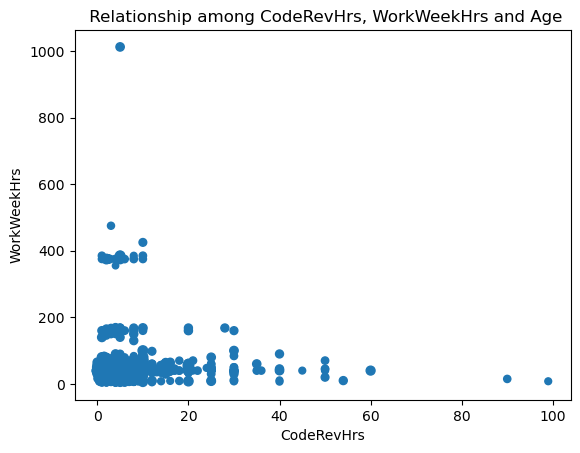

In [11]:
QUERY ='''
select Age, WorkWeekHrs, CodeRevHrs from master
'''
df_buble = pd.read_sql_query(QUERY, conn)
df_buble.plot.scatter(x= 'CodeRevHrs', y='WorkWeekHrs', s ='Age', title =' Relationship among CodeRevHrs, WorkWeekHrs and Age')

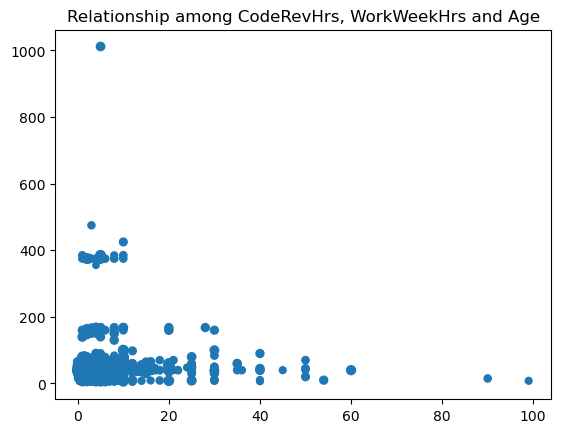

In [12]:
# Creating Scatter Plot using Matplotlib
plt.scatter('CodeRevHrs', 'WorkWeekHrs', s='Age', data= df_buble)
plt.title('Relationship among CodeRevHrs, WorkWeekHrs and Age')
plt.show()


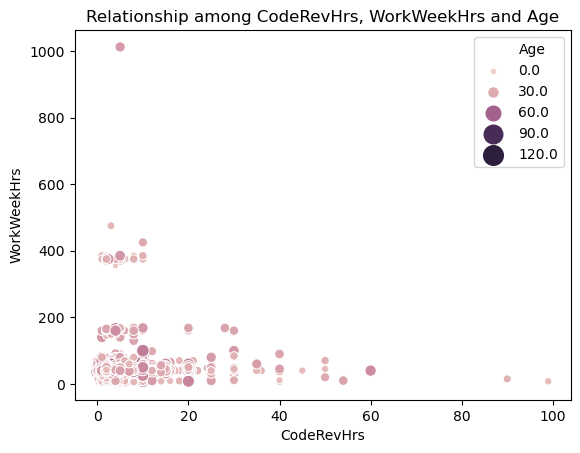

In [13]:
# Create buble chart using seaborn
sns.scatterplot('CodeRevHrs', 'WorkWeekHrs', hue ='Age', data= df_buble, size='Age', sizes =(10,200))
plt.title('Relationship among CodeRevHrs, WorkWeekHrs and Age')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


                        Respondent
DatabaseDesireNextYear            
PostgreSQL                    4328
MongoDB                       3649
Redis                         3331
MySQL                         3281
Elasticsearch                 2856


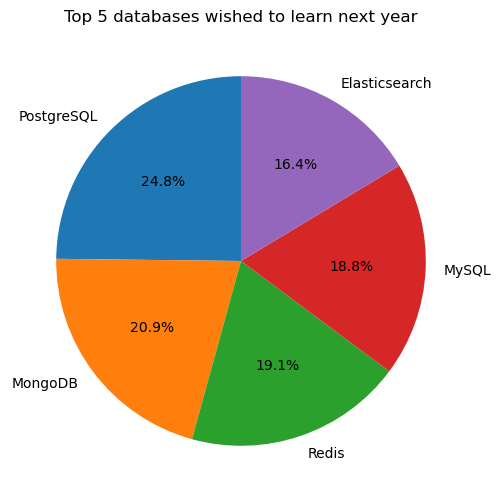

In [6]:
# Take a look into DatabaseDesireNextYear table
QUERY ='''
select * from DatabaseDesireNextYear
'''
df_pie = pd.read_sql_query(QUERY, conn)
# Group dataframe by DatabaseDesireNextYear and count the total respondents (not SUM)
df_pie=pd.DataFrame(df_pie.groupby('DatabaseDesireNextYear')['Respondent'].count())
# Sort values by descending order
df_pie.sort_values(by='Respondent', ascending=False, inplace=True)
# Choose the first 5 rows
df_pie= df_pie.iloc[0:5]
print(df_pie)
# Plot pie chart
plt.figure(figsize=(10,6))
plt.pie(df_pie['Respondent'],labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 databases wished to learn next year')
plt.show()


  DatabaseDesireNextYear  Total_Respondent
0             PostgreSQL              4328
1                MongoDB              3649
2                  Redis              3331
3                  MySQL              3281
4          Elasticsearch              2856


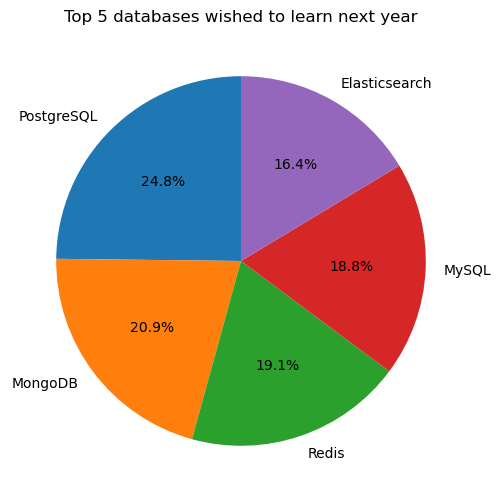

In [7]:
# Alternative way: Take a look into DatabaseDesireNextYear table and get the required data
QUERY ='''
select DatabaseDesireNextYear, count(Respondent) as Total_Respondent from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(Respondent) desc limit 5
'''
df_pie1 = pd.read_sql_query(QUERY, conn)
print(df_pie1)
# Plot pie chart
plt.figure(figsize=(10,6))
plt.pie(df_pie1['Total_Respondent'],labels=df_pie1['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 databases wished to learn next year')
plt.show()


In [8]:
# Take a look into DatabaseWorkedWith table and get the required data
QUERY ='''
select DatabaseWorkedWith, count(Respondent) as Total_Respondent from DatabaseWorkedWith where DatabaseWorkedWith = 'MySQL'
'''
df_pie3 = pd.read_sql_query(QUERY, conn)
df_pie3


,DatabaseWorkedWith,Total_Respondent
0,MySQL,5469


  LanguageDesireNextYear  Total_Respondent
0             JavaScript              6630
1               HTML/CSS              5328
2                 Python              5239
3                    SQL              5012
4             TypeScript              4088


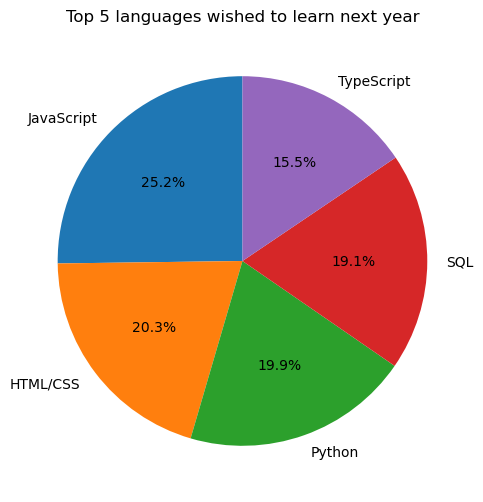

In [9]:
## Query the required data
QUERY ='''
select LanguageDesireNextYear, count(Respondent) as Total_Respondent from LanguageDesireNextYear group by LanguageDesireNextYear order by count(Respondent) desc limit 5
'''
df_pie = pd.read_sql_query(QUERY, conn)
print(df_pie)
# Plot pie chart
plt.figure(figsize=(10,6))
plt.pie(df_pie['Total_Respondent'],labels=df_pie['LanguageDesireNextYear'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 languages wished to learn next year')
plt.show()


      LanguageWorkedWith  Total_Respondent
0             JavaScript              8687
1               HTML/CSS              7830
2                    SQL              7106
3  Bash/Shell/PowerShell              4642
4                 Python              4542


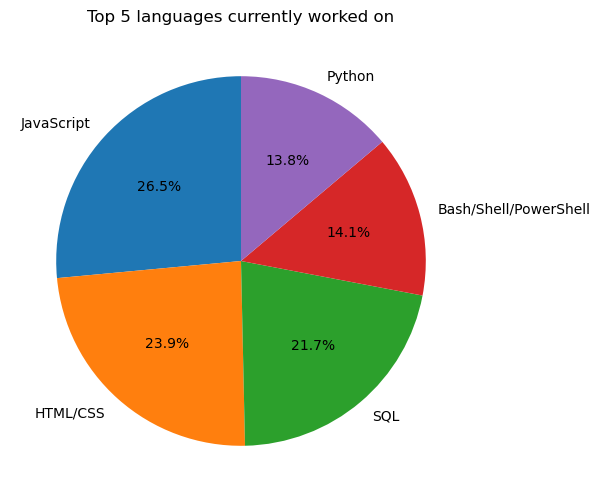

In [10]:
# Query to get required data
QUERY ='''
select LanguageWorkedWith, count(Respondent) as Total_Respondent from LanguageWorkedWith group by LanguageWorkedWith order by count(Respondent) desc limit 5
'''
df_pie = pd.read_sql_query(QUERY, conn)
print(df_pie)
# Plot pie chart
plt.figure(figsize=(10,6))
plt.pie(df_pie['Total_Respondent'],labels=df_pie['LanguageWorkedWith'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 languages currently worked on')
plt.show()


### Stacked Chart


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


      WorkWeekHrs  CodeRevHrs
Age                          
30.0         40.0         4.0
31.0         40.0         4.0
32.0         40.0         4.0
33.0         40.0         4.0
34.0         40.0         4.0
35.0         40.0         4.0


<Figure size 800x1000 with 0 Axes>

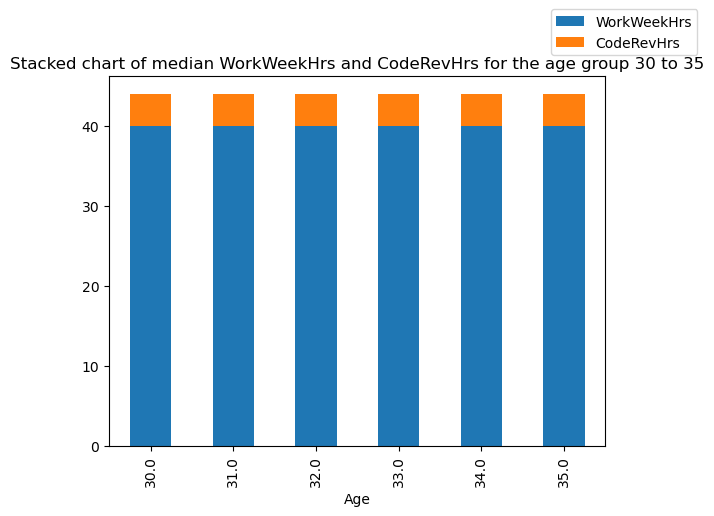

In [11]:
QUERY ='''
select Age, WorkWeekHrs, CodeRevHrs from master where Age between 30 and 35
'''
df = pd.read_sql_query(QUERY, conn)
# Group data by Age
df_stack = df.groupby('Age').median()
print(df_stack)
# Plot stacked bar chart
plt.figure(figsize=(8,10))
df_stack.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.2, 1.2), loc= 'upper right')
plt.title('Stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
plt.show()

## Visualizing comparison of data


### Line Chart


       Age  ConvertedComp
0     28.0        90000.0
1     26.0       455352.0
2     29.0        65277.0
3     27.0        20623.0
4     27.0       107000.0
...    ...            ...
4312  26.0        35518.0
4313  26.0        26586.0
4314  25.0        19880.0
4315  25.0        80371.0
4316  30.0            NaN

[4317 rows x 2 columns]


<Figure size 800x1000 with 0 Axes>

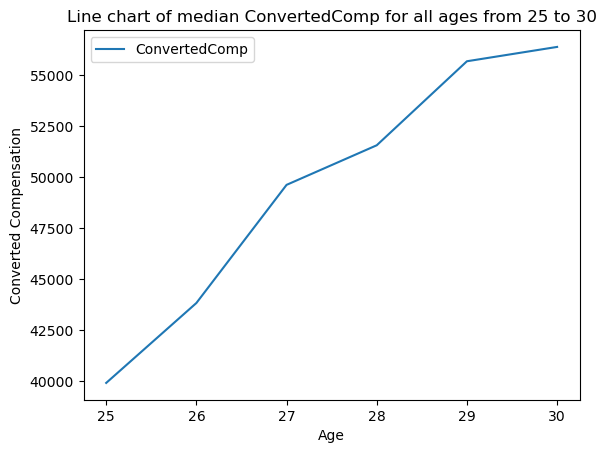

In [15]:
# Get data from database Age between 25 and 30
QUERY ='''
select Age, ConvertedComp from master where Age between 25 and 30
'''
df = pd.read_sql_query(QUERY, conn)
# Group data by Age and remove missing values
df_line = df.groupby('Age').median().dropna()
print(df)
# Plot line chart
plt.figure(figsize=(8,10))
df_line.plot(kind='line', stacked=True)
plt.ylabel('Converted Compensation')
plt.title('Line chart of median ConvertedComp for all ages from 25 to 30')
plt.show()


      Age  ConvertedComp
0    47.0       103000.0
1    54.0            NaN
2    47.0        54996.0
3    47.0        62807.0
4    45.0        72522.0
..    ...            ...
594  45.0        76339.0
595  46.0        68705.0
596  48.0       300000.0
597  50.0        87668.0
598  50.0        59652.0

[599 rows x 2 columns]


<Figure size 800x1000 with 0 Axes>

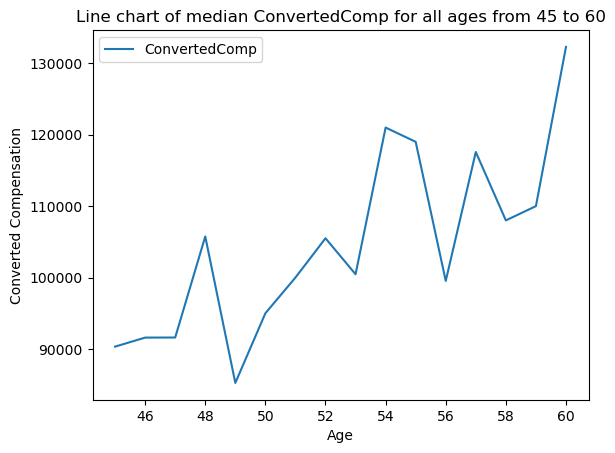

In [17]:
# Get data from database Age between 45 and 60
QUERY ='''
select Age, ConvertedComp from master where Age between 45 and 60
'''
df = pd.read_sql_query(QUERY, conn)
# Group data by Age and remove missing values
df_line = df.groupby('Age').median().dropna()
print(df)
# Plot line chart
plt.figure(figsize=(8,10))
df_line.plot(kind='line', stacked=True)
plt.ylabel('Converted Compensation')
plt.title('Line chart of median ConvertedComp for all ages from 45 to 60')
plt.show()


Plot the median `ConvertedComp` for all ages from 45 to 60.


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


                                                        0
MainBranch                                               
I am a developer by profession                      10618
I am not primarily a developer, but I write cod...    780


<Figure size 800x600 with 0 Axes>

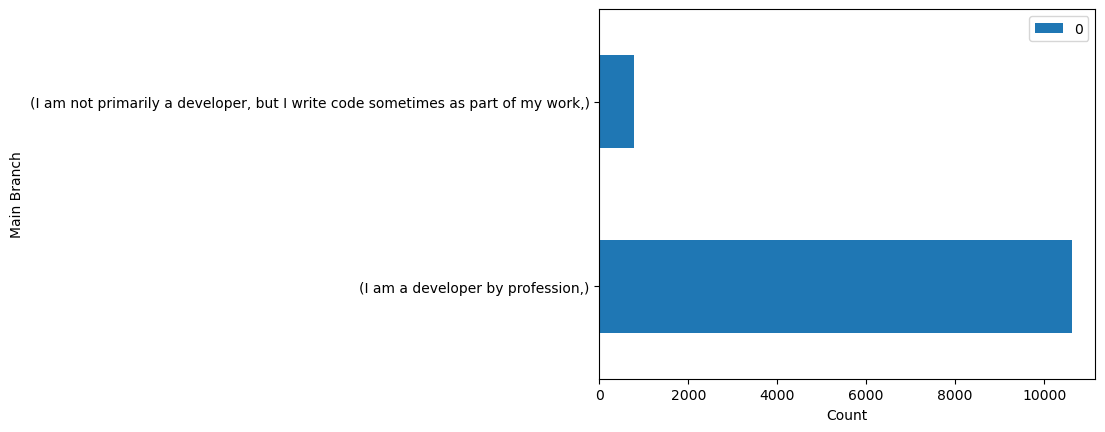

In [12]:
# Get data from database
QUERY ='''
select MainBranch from master
'''
df = pd.read_sql_query(QUERY, conn)
df_bar=pd.DataFrame(df.value_counts())
print(df_bar)
# Plot horizontal bar chart
plt.figure(figsize=(8,6))
df_bar.plot(kind='barh')
plt.ylabel('Main Branch')
plt.xlabel('Count')
plt.show()

In [14]:
# Get data from database
QUERY ='''
select DevType from DevType
'''
df = pd.read_sql_query(QUERY, conn) 
df.head()

,DevType
0,"Developer, full-stack"
1,Database administrator
2,"Developer, back-end"
3,"Developer, front-end"
4,"Developer, full-stack"


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
